In [32]:
import pandas as pd

df = pd.read_json('C:/Users/ASUS/Desktop/Exercise in class - ML/data/MLA_100k.jsonlines', lines=True)
df

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,...,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,...,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,...,active,None,NaN,NaN,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,...,active,None,NaN,NaN,1,2015-09-09 23:57:07+00:00,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",None,[],new,None,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,...,active,None,NaN,NaN,1,2015-09-28 18:47:56+00:00,http://articulo.mercadolibre.com.ar/MLA-581877...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,None,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,...,active,None,NaN,NaN,1,2015-08-24 22:07:20+00:00,http://articulo.mercadolibre.com.ar/MLA-576112...,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,"{'comment': '', 'longitude': -58.6142895, 'id'...",None,[],used,None,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",86277472,...,active,None,NaN,NaN,1,2015-09-28 01:04:49+00:00,http://articulo.mercadolibre.com.ar/MLA-581735...,"{'latitude': -34.4893206, 'longitude': -58.614...",0,1
99996,"{'comment': '', 'longitude': '', 'id': 1114571...",None,[],new,None,[],239.0,"{'local_pick_up': False, 'methods': [], 'tags'...","[{'description': 'Tarjeta de crédito', 'id': '...",120301324,...,active,None,NaN,NaN,5,2015-09-11 18:09:02+00:00,http://articulo.mercadolibre.com.ar/MLA-579045...,"{'latitude': '', 'longitude': ''}",0,5
99997,"{'comment': '', 'longitude': -58.6241199, 'id'...",None,[],used,None,[],600.0,"{'local_pick_up': False, 'methods': [], 'tags'...",[],12147240,...,active,None,NaN,NaN,1,2015-09-06 22:29:30+00:00,http://articulo.mercadolibre.com.ar/MLA-578170...,"{'latitude': -34.6467858, 'longitude': -58.624...",0,1
99998,"{'comment': '', 'longitude': -58.4020374, 'id'...","Buen estado, se verifica al entregar. la total...",[],used,None,[],50.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",86102489,...,active,None,NaN,NaN,1,2015-08-18 17:22:28+00:00,http://articulo.mercadolibre.com.ar/MLA-575062...,"{'latitude': -34.6100093, 'longitude': -58.402...",0,1


Mostrar información general

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   seller_address                    100000 non-null  object             
 1   warranty                          39104 non-null   object             
 2   sub_status                        100000 non-null  object             
 3   condition                         100000 non-null  object             
 4   seller_contact                    2219 non-null    object             
 5   deal_ids                          100000 non-null  object             
 6   base_price                        100000 non-null  float64            
 7   shipping                          100000 non-null  object             
 8   non_mercado_pago_payment_methods  100000 non-null  object             
 9   seller_id                         100000 non-null

Verificar columnas disponibles

In [34]:
print(df.columns)

Index(['seller_address', 'warranty', 'sub_status', 'condition',
       'seller_contact', 'deal_ids', 'base_price', 'shipping',
       'non_mercado_pago_payment_methods', 'seller_id', 'variations',
       'location', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'geolocation', 'sold_quantity', 'available_quantity'],
      dtype='object')


Ver distribución de la variable objetivo 

<Axes: title={'center': 'Distribución de condición (Target)'}, xlabel='condition', ylabel='Cantidad'>

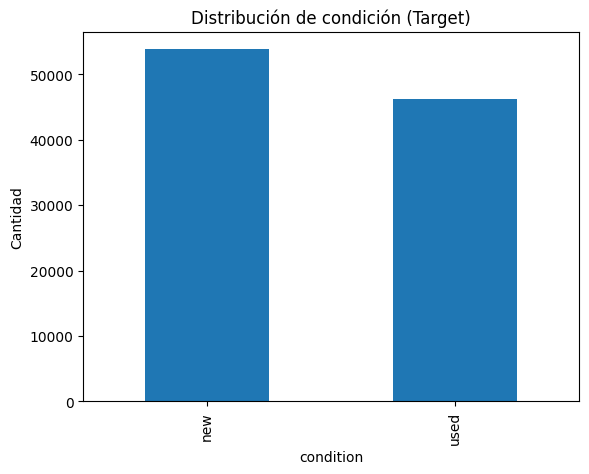

In [35]:
df['condition'].value_counts().plot(kind='bar', title='Distribución de condición (Target)', ylabel='Cantidad')


 Selección de variables relevantes (features)

variables directamente utiles que no necesitan transformacion

In [36]:
vars_directas = [
    'price',               # Precio final
    'base_price',          # Precio base (antes de descuento)
    'sold_quantity',       # Cuántos productos se han vendido
    'available_quantity'   # Cuántos quedan disponibles
]

 Variables útiles que necesitasn transformacion

In [37]:
# Crear columnas nuevas basadas en transformación
df['has_warranty'] = df['warranty'].notnull().astype(int)

# Shipping: si tiene envío gratuito
df['free_shipping'] = df['shipping'].apply(lambda x: x.get('free_shipping') if isinstance(x, dict) else False)

# Cantidad de imágenes
df['picture_count'] = df['pictures'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Longitud del título en palabras
df['title_length'] = df['title'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Extraer ubicación: estado
df['state'] = df['seller_address'].apply(lambda x: x.get('state', {}).get('name') if isinstance(x, dict) else None)


hacer una tabla con las columnas finales que usaremos para modelar

In [38]:
final_features = [
    'price', 'base_price', 'sold_quantity', 'available_quantity',
    'has_warranty', 'free_shipping', 'picture_count', 'title_length',
    'state', 'buying_mode', 'listing_type_id', 'condition'  
]

data_model = df[final_features]


Eliminar columnas innecesarias

Verificar valores nulos

In [39]:
data_model.isnull().sum()

price                 0
base_price            0
sold_quantity         0
available_quantity    0
has_warranty          0
free_shipping         0
picture_count         0
title_length          0
state                 0
buying_mode           0
listing_type_id       0
condition             0
dtype: int64

In [40]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   price               100000 non-null  float64
 1   base_price          100000 non-null  float64
 2   sold_quantity       100000 non-null  int64  
 3   available_quantity  100000 non-null  int64  
 4   has_warranty        100000 non-null  int64  
 5   free_shipping       100000 non-null  bool   
 6   picture_count       100000 non-null  int64  
 7   title_length        100000 non-null  int64  
 8   state               100000 non-null  object 
 9   buying_mode         100000 non-null  object 
 10  listing_type_id     100000 non-null  object 
 11  condition           100000 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 8.5+ MB


Codificar variables categóricas

Revisar los valores únicos

In [41]:
print(data_model['buying_mode'].unique())
print(data_model['listing_type_id'].unique())
print(data_model['condition'].unique())
print(data_model['state'].unique())

['buy_it_now' 'classified' 'auction']
['bronze' 'silver' 'free' 'gold_special' 'gold' 'gold_premium' 'gold_pro']
['new' 'used']
['Capital Federal' 'Buenos Aires' 'Santa Fe' 'Tucumán' 'Mendoza' 'Córdoba'
 'La Pampa' 'Chubut' 'Entre Ríos' 'Jujuy' 'Santiago del Estero'
 'Corrientes' 'Salta' 'Formosa' 'Chaco' 'Santa Cruz' 'Río Negro'
 'Misiones' 'San Juan' 'Neuquén' 'La Rioja' 'San Luis' 'Catamarca'
 'Tierra del Fuego' '']


In [42]:
# Codificar 'condition' como 0 (used) y 1 (new)
data_model['condition'] = data_model['condition'].map({'used': 0, 'new': 1})

# Codificar 'buying_mode' y 'listing_type_id' con One-Hot Encoding
data_model = pd.get_dummies(data_model, columns=['buying_mode', 'listing_type_id'], 
                            drop_first=True)  # esto para evitar la multicolinealidad 


top_states = data_model['state'].value_counts().nlargest(10).index
data_model['state'] = data_model['state'].apply(lambda x: x if x in top_states else 'Other')
data_model = pd.get_dummies(data_model, columns=['state'], drop_first=True)

data_model['free_shipping'] = data_model['free_shipping'].astype(int)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11812\2668819786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['condition'] = data_model['condition'].map({'used': 0, 'new': 1})


Guardar dataset limpio

In [43]:
data_model.to_csv("C:/Users/ASUS/Desktop/Exercise in class - ML/data/data_clean.csv", index=False)